# Problem statement : calculate salary with experience 

In [9]:
import pandas as pd
import numpy as np

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('Salary_Data.csv')

In [12]:
df.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [13]:
df.tail()

YearsExperience    Salary
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

In [14]:
df.shape

(30, 2)

In [15]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [16]:
df.count()

YearsExperience    30
Salary             30
dtype: int64

In [17]:
cor=df.corr()
cor

YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000

<AxesSubplot:>

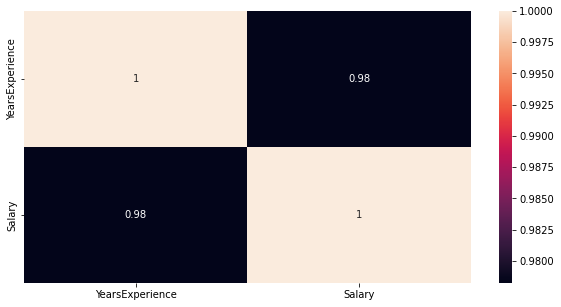

In [18]:
plt.figure(figsize=(10,5)) 
sns.heatmap(cor,annot = True)

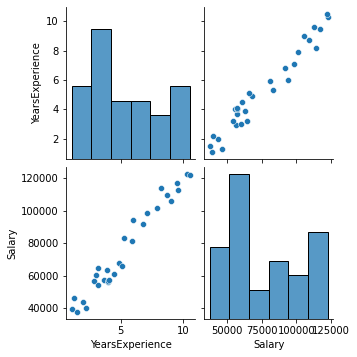

In [19]:
sns.pairplot(df)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

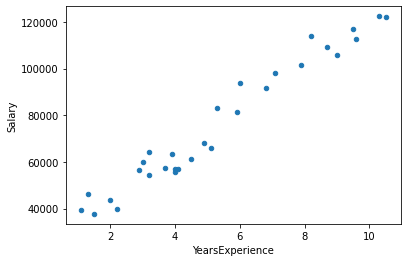

In [20]:
df.plot(x = 'YearsExperience',y = 'Salary',kind = 'scatter')

C:\Users\HOME\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

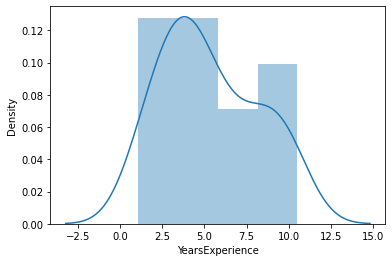

In [21]:
sns.distplot(df["YearsExperience"],kde = True)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x=df[["YearsExperience"]]
y=df[["Salary"]]

In [25]:
x_train,x_test,y_train,y_test= train_test_split(x,y ,test_size=0.2 , random_state=24)

In [26]:
lr=LinearRegression()

In [27]:
x_train.shape

(24, 1)

In [28]:
x_test.shape

(6, 1)

In [29]:
y_train.shape

(24, 1)

In [30]:
y_test.shape

(6, 1)

In [31]:
lr.fit(x_train,y_train)

LinearRegression()

#  model evaulation

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [33]:
y_pred_lr=lr.predict(x_test)
y_pred_lr

array([[ 62149.58192134],
       [ 63113.15871241],
       [116109.8822211 ],
       [ 55404.54438387],
       [ 53477.39080174],
       [117073.45901216]])

In [34]:
mse=mean_squared_error(y_test,y_pred_lr)
mse

30955226.717302386

In [35]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error is :',rmse)

Root Mean Squared Error is : 5563.742150504675


In [36]:
mae= mean_absolute_error(y_test,y_pred_lr)
mae

4705.869732754952

In [37]:
lr_r=r2_score(y_test,y_pred_lr)
print('lr_r:',lr_r)

lr_r: 0.9520702017424296


In [38]:
c=lr.intercept_
c

array([24570.08706972])

In [39]:
m=lr.coef_
m

array([[9635.76791067]])

In [40]:
lr_score=lr.score(x_test,y_test)
print('lr_score:',lr_score)

lr_score: 0.9520702017424296


In [41]:
score_train=lr.score(x_train,y_train)
score_train 

0.9573037769139975

In [42]:
y_test
y_pred_lr

residual = np.array(y_test-y_pred_lr)  

In [35]:
import statsmodels.api as sm

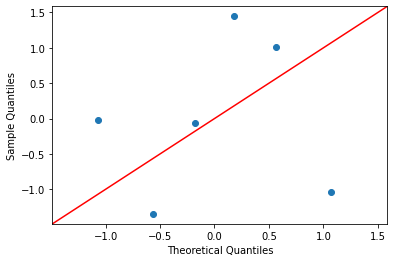

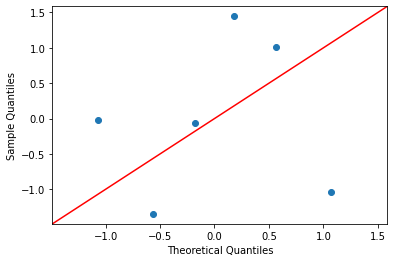

In [36]:
sm.qqplot(residual,line = '45', fit = True)

In [61]:
residual

array([[ 1068.41807866],
       [-6156.15871241],
       [  859.1177789 ],
       [ 9040.45561613],
       [ 6672.60919826],
       [-4438.45901216]])

# After log transform

In [ ]:
df[["Salary_log"]]=np.log(df[["Salary"]])
df

In [ ]:
x=df[["YearsExperience"]]
y=df[["Salary_log"]]
x_train,x_test,y_train,y_test= train_test_split(x,y ,test_size=0.2 , random_state=24)
lr_log=LinearRegression()
lr.fit(x_train,y_train)

In [ ]:
y_pred_log=lr.predict(x_test)
y_pred_log

In [ ]:
score=lr.score(x_test,y_test)
score

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mse

In [ ]:
r=r2_score(y_test,y_pred)
r

# knn 

In [62]:
x=df[["YearsExperience"]]
y=df[["Salary"]]

In [63]:
from sklearn.neighbors  import KNeighborsRegressor

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=24)

In [65]:
y_test[0:5]

Salary
10   63218.0
12   56957.0
26  116969.0
8    64445.0
6    60150.0

In [66]:
knn=KNeighborsRegressor(n_neighbors=5,p=1)

In [67]:
knn.fit(x_test,y_test)

KNeighborsRegressor(p=1)

In [68]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([[72347.8],
       [72347.8],
       [82844.8],
       [72347.8],
       [72347.8],
       [82844.8]])

In [69]:
knn_score=knn.score(x_test,y_test)
print('knn_score :',knn_score)

knn_mse=mean_squared_error(y_test,y_pred_knn)
print('knn_mse :',knn_mse)
knn_r=r2_score(y_test,y_pred_knn)
print('knn_r:',knn_r)

knn_score : 0.33333150812337065
knn_mse : 430564597.84
knn_r: 0.33333150812337065


In [70]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [71]:
n_neighbors = np.arange(5,12)
p = [1,2]

In [72]:
hyperparameters = {'n_neighbors':np.arange(5,9), 'p':[1,2]}
hyperparameters

{'n_neighbors': array([5, 6, 7, 8]), 'p': [1, 2]}

In [73]:
knn_hype= KNeighborsRegressor() 
gscv = GridSearchCV(knn_hype,hyperparameters, cv = 5)   # data divide 5 set
knn_hype= gscv.fit(x_train,y_train)
knn_hype

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([5, 6, 7, 8]), 'p': [1, 2]})

In [74]:
knn_hype.best_estimator_

KNeighborsRegressor(p=1)

# DT

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [76]:
x=df[["YearsExperience"]]
y=df[["Salary"]]

In [77]:
y[0:5]

Salary
0  39343.0
1  46205.0
2  37731.0
3  43525.0
4  39891.0

In [78]:
x_train,x_test,y_train,y_test= train_test_split(x,y ,test_size=0.2 , random_state=24)

In [79]:
y_test

Salary
10   63218.0
12   56957.0
26  116969.0
8    64445.0
6    60150.0
27  112635.0

In [80]:
dt = DecisionTreeRegressor(random_state=24)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=24)

In [81]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([ 55794.,  55794., 105582.,  54445.,  56642., 105582.])

In [82]:
dt_score=knn.score(x_test,y_test)
print('dt_score :',knn_score)

dt_mse=mean_squared_error(y_test,y_pred_dt)
print('dt_mse :',dt_mse)
dt_r=r2_score(y_test,y_pred_dt)
print('dt_r:',dt_r)

dt_score : 0.33333150812337065
dt_mse : 58030497.833333336
dt_r: 0.9101479669543694


In [83]:
dt.tree_.node_count

47

In [84]:
plt.figure(figsize=(300,250))
tree = plot_tree(decision_tree = dt, feature_names = df.columns,
         class_names=['0','1'],filled=True, rounded= True)

# rondom forest 

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
rd= RandomForestRegressor(n_estimators =30, random_state =24)

In [87]:
rd.fit(x,y) 

C:\Users\HOME\AppData\Local\Temp/ipykernel_1308/1747927631.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rd.fit(x,y)


RandomForestRegressor(n_estimators=30, random_state=24)

In [88]:
y_pred_rd=rd.predict(x_test)
y_pred_rd

array([ 60950.08888889,  56773.51666667, 114278.83333333,  58654.95555556,
        59391.3       , 112688.3       ])

In [89]:
rd_score=rd.score(x_test,y_test)
print('dt_score :',rd_score)

rd_mse=mean_squared_error(y_test,y_pred_rd)
print('dt_mse :',dt_mse)
rd_r=r2_score(y_test,y_pred_rd)
print('dt_r:',dt_r)

dt_score : 0.9879957895920974
dt_mse : 58030497.833333336
dt_r: 0.9101479669543694


In [90]:
print('lr_r:',lr_r)
print('lr_score:',lr_score)

lr_r: 0.9520702017424296
lr_score: 0.9520702017424296


In [91]:
print('knn_score :',knn_score)
print('knn_r:',knn_r)

knn_score : 0.33333150812337065
knn_r: 0.33333150812337065


In [92]:
print('dt_score :',knn_score)
print('dt_r:',dt_r)

dt_score : 0.33333150812337065
dt_r: 0.9101479669543694


In [93]:
print('rd_score :',rd_score)
print('rd_r:',dt_r)

rd_score : 0.9879957895920974
rd_r: 0.9101479669543694


In [97]:
dict={'score':['lr_score','knn_score','dt_score','rd_score'],
       'Value' :[lr_score,knn_score,dt_score,rd_score]}

In [99]:
df1 = pd.DataFrame(dict)

In [100]:
df1

score     Value
0   lr_score  0.952070
1  knn_score  0.333332
2   dt_score  0.333332
3   rd_score  0.987996

<BarContainer object of 4 artists>

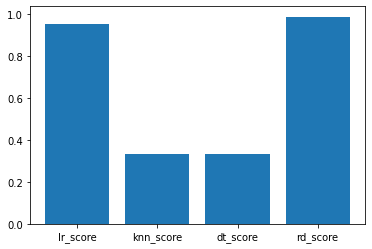

In [101]:
plt.bar(df1['score'],df1['Value'] )

In [43]:
import pickle

In [44]:
#saving model
pickle.dump(lr, open('model.pkl','wb'))

In [47]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))